#### Homework3
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. 

Q1 (30 points) Hyper-parameter Tuning: Provide your coding for this exercise. Your code should run without error and the output should be correct based on your assumptions. 
- Create a dummy dataset with 3 input features (X) and a numeric output variable (y). Your daatset should have 300 data points. The train:test split is 75:25. 
- Standardize the input features. 
- Construct a 3-layer neural network with 2 neurons in the hidden layer and one neuron in the output layer. Use Relu as the activation function in the hidden layer. Use Sigmoid as the activation function in the output layer. 
- At this step, you are to use grid search to perform hyper-parameter tuning based on regularization and regularization parameter, momentum term, and batch size. For each paramter, try 2 different values. Refer to "lec11-grid-search.ipynb" as a reference. You are not allowed to copy-paste the code to solve this assignment. Just use it to learn what to do. Use SGD as your optimization technique. 
- In your code, report which subset of hyper-parameters give the best model. Then using the best hyper-parameters that you reported, visualize the MSE loss on train and test data over multiple epochs (the number of epochs depends on model convergence). 

Note: Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code.

/Users/jashan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jashan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Hyperparameters: ('l2', 0.001, 0.9, 16)
Minimum Final Test MSE: 0.004022879060357809


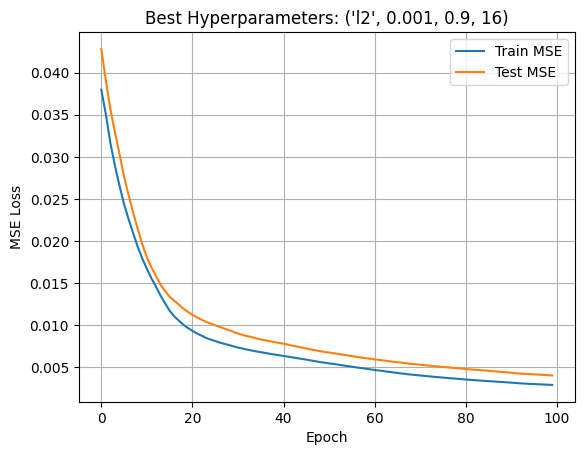

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt
import itertools

# Generate dummy dataset
X, y = make_regression(n_samples=300, n_features=3, noise=0.1)
y = (y - y.min()) / (y.max() - y.min())  # Normalize target to [0, 1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter grid
reg_types = ['l1', 'l2']
reg_params = [0.001, 0.01]
momentum_vals = [0.0, 0.9]
batch_sizes = [16, 32]
epochs = 100

# Store results
results = []
best_loss = float('inf')
best_params = None
best_history = None

# Grid search
for reg_type, reg_param, momentum, batch_size in itertools.product(reg_types, reg_params, momentum_vals, batch_sizes):
    if reg_type == 'l1':
        regularizer = l1(reg_param)
    else:
        regularizer = l2(reg_param)

    # Define model
    model = Sequential([
        Dense(2, input_dim=3, activation='relu', kernel_regularizer=regularizer),
        Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=0.01, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0)

    final_val_loss = history.history['val_loss'][-1]
    results.append(((reg_type, reg_param, momentum, batch_size), final_val_loss))

    if final_val_loss < best_loss:
        best_loss = final_val_loss
        best_params = (reg_type, reg_param, momentum, batch_size)
        best_history = history.history

# Print best parameters
print("Best Hyperparameters:", best_params)
print("Minimum Final Test MSE:", best_loss)

# Plot loss curves for best model
plt.plot(best_history['loss'], label='Train MSE')
plt.plot(best_history['val_loss'], label='Test MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title(f'Best Hyperparameters: {best_params}')
plt.legend()
plt.grid(True)
plt.show()


Q2- (30 points) Given the information below, use Naïve Bayes to determine whether File 6 belongs to class label "Spam" or "Ham" given its features. Answering following questions clearly and accurately. Provide your computational work. 
![Generated Dataset](tbl1.jpg)
- What are the prior probabilities P(Spam), P(Ham)? 
- Compute the required conditional probabilitues corresponding to the parameters of the model by filling the table below. 
![Generated Dataset](tbl2.jpg)
- What is the probability of File 6 being a Spam? What is the probability of File 6 being a Ham? What can you conclude about the category of File 6? Justify your answer. 

### Q2: Naïve Bayes Classification for File 6

**Step 1: Prior Probabilities**

- Total labeled files: 5  
- Spam files: 2 (Files 1 and 4)  
- Ham files: 3 (Files 2, 3, and 5)  

\[
P(Spam) = \frac{2}{5} = 0.4 \quad\quad P(Ham) = \frac{3}{5} = 0.6
\]

---

**Step 2: Word Counts**

**Spam Files:**
- File 1: Price, Ticket, Free  
- File 4: Ticket, Tax, Puppy  

Word frequencies in Spam (6 words total):  
- Price: 1  
- Ticket: 2  
- Free: 1  
- Tax: 1  
- Puppy: 1  

**Ham Files:**
- File 2: Tax, Price, Puppy  
- File 3: Free, Puppy, Ticket, Price  
- File 5: Price, Tax, Puppy  

Word frequencies in Ham (9 words total):  
- Price: 3  
- Ticket: 1  
- Free: 1  
- Tax: 2  
- Puppy: 3  

---

**Step 3: Conditional Probabilities**

| Word   | P(word\|Spam) | P(word\|Ham) |
|--------|----------------|----------------|
| Price  | 1/6 ≈ 0.167    | 3/9 ≈ 0.333     |
| Ticket | 2/6 ≈ 0.333    | 1/9 ≈ 0.111     |
| Free   | 1/6 ≈ 0.167    | 1/9 ≈ 0.111     |
| Tax    | 1/6 ≈ 0.167    | 2/9 ≈ 0.222     |
| Puppy  | 1/6 ≈ 0.167    | 3/9 ≈ 0.333     |

---

**Step 4: Likelihoods for File 6 (`Price, Tax, Free`)**

\[
P(File6|Spam) = 0.167 \times 0.167 \times 0.167 \approx 0.0046
\]
\[
P(File6|Ham) = 0.333 \times 0.222 \times 0.111 \approx 0.0082
\]

---

**Step 5: Posterior Probabilities (unnormalized)**

\[
P(Spam|File6) \propto 0.4 \times 0.0046 = 0.00184
\]
\[
P(Ham|File6) \propto 0.6 \times 0.0082 = 0.00492
\]

---

**Final Conclusion:**

Since  
\[
P(Ham|File6) > P(Spam|File6)
\]  
**→ File 6 is more likely to be classified as Ham.**


Q3- (6 points) A patient with a positive test wants to know how probable it is to have flu. Find the probability given the information below and provide your computational work. 
Prior probability: P(not flu)=0.15
Likelihood: P(positive│ flu)=0.85
Evidence: P(negative)=0.25


### Q3: Bayes' Rule – Flu Test with Given Evidence

**Given:**
- Prior: P(not flu) = 0.15 → P(flu) = 1 - 0.15 = 0.85  
- Likelihood: P(positive | flu) = 0.85  
- Evidence: P(negative) = 0.25 → P(positive) = 1 - 0.25 = 0.75  

---

**Step 1: Use Bayes’ Rule**

\[
P(flu | positive) = \frac{P(positive | flu) \cdot P(flu)}{P(positive)}
\]
\[
= \frac{(0.85)(0.85)}{0.75} = \frac{0.7225}{0.75} \approx 0.9633
\]

---

**Conclusion:**  
> There is approximately a **96.33%** chance the patient has the flu given a positive test result.


Q4- (8 points) Imagine you are tasked with developing a binary classification model to classify emails as either "spam" or "not spam" based on their content. The observations in the dataset cover several aspects listed in the following table: 


![Generated Dataset](tbl3.jpg)

You have two different approaches in mind: Naive Bayes classification and Bayesian networks. Answer the following question in the context of this email classification (as “spam” or “not spam”): 
Discuss the assumptions in Naïve Bayes and Bayesian Network algorithms, as well as advantages and disadvantages of using Naïve Bayes and Bayesian Network classification. Your answer should address the following points: 
-	What aspects of the problem make Naïve Bayes classification suitable or unsuitable? 
-	Similarly, analyze the suitability of using Bayesian networks for the email classification problem and indicate what unique characteristics of Bayesian networks make them a potentially good or bad choice for this task? 
-	Discuss these methods in terms of their computational efficiency and classification accuracy, considering the features listed in the above table. 
Include your answer in a table with the following layout:
![Generated Dataset](tbl4.jpg)


### Q4: Naïve Bayes vs Bayesian Networks – Email Classification

| Approach         | Assumptions                                                                                          | Advantages                                                                 | Disadvantages                                                               |
|------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Naïve Bayes**  | Assumes all features (e.g., text length, vocabulary, metadata) are conditionally independent given the class. | Fast, easy to implement, and works well with high-dimensional sparse data. | The independence assumption often doesn’t hold; can miss interactions between features. |
| **Bayesian Networks** | Models conditional dependencies between features using a graph structure.                             | Captures complex relationships (e.g., tone, grammar, language usage); better modeling of structured data. | Computationally expensive; requires more data and setup to train accurately. |

---

**Analysis of Suitability:**

- **Naïve Bayes** is suitable when simplicity and speed are priorities, especially with structured features like word frequency or metadata that can be treated as independent.
- **Bayesian Networks** are more appropriate when the classification task involves interactions between features — such as the relationship between emotional tone and grammar, or when context from previous emails matters.

---



- Use **Naïve Bayes** for simple spam detection tasks with limited computational resources.
- Use **Bayesian Networks** when deeper contextual modeling (e.g., involving metadata or sentence structure) is critical and enough data is available to support complex modeling.


Q5- (6 points) Given the following probability table, build a Naïve Bayes classifier using the Discriminant function. Can this classifier accurately predict if a patient is healthy/not-healthy based on the Test results? (e.g., can a positive test result indicate with high confidence that a patient has flu? How about a negative test result?) Show your mathematical work with proper explanation. Please note that P(Healthy) = 0.25. 
![Generated Dataset](tbl5.jpg)

### Q5: Naïve Bayes – Health Prediction Using Test Results

**Given:**

| Test Result | P(Result | Has-Flu) | P(Result | Healthy) |
|-------------|---------------------|---------------------|
| Positive    | 0.8                 | 0.1                 |
| Negative    | 0.2                 | 0.9                 |

Also given:  
- P(Healthy) = 0.25 → P(Has-Flu) = 1 - 0.25 = 0.75  


---

**Step 1: Total Probability of a Positive Test**

\[
P(Positive) = P(Positive|Flu) \cdot P(Flu) + P(Positive|Healthy) \cdot P(Healthy)
\]
\[
= (0.8)(0.75) + (0.1)(0.25) = 0.6 + 0.025 = 0.625
\]

---

**Step 2: Apply Bayes’ Rule**

\[
P(Flu | Positive) = \frac{P(Positive | Flu) \cdot P(Flu)}{P(Positive)} = \frac{0.8 \cdot 0.75}{0.625} = \frac{0.6}{0.625} = 0.96
\]

---

**Conclusion:**
> The probability that a patient has the flu given a **positive test result** is **96%**.  
> This indicates the test is highly reliable in detecting flu.


Q6-(Optional Question- 8 extra points based on the completeness of the answer) Based on the optional document "Lec12-MultivariateDistributions.pdf", describe how conditional probabilities are computed in training a Bayesian Network model when the random variables are continuous. Provide an example.  